

# **Basics of Knowledge Graphs**
##### Web Based Systems 2024, [FCSE](https://finki.ukim.mk/)

In [1]:
%%javascript
Jupyter.notebook.config.update({
    "output_text_lines": 10
});

<IPython.core.display.Javascript object>

## Exploring RDF with Python methods

The goal of this auditory exercise is to give an introduction into manipulating knowledge graphs using Python and rdflib. Further, we will explore how to convert an rdflib graph into formats from other graph libraries.


First, we need to install *rdflib*, and do some housekeeping to prepare the necessary libraries.

Import all the libraries we are going to use.

In [2]:
import requests
import urllib

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from rdflib import Graph, URIRef, Literal
from rdflib.namespace import RDFS, FOAF, RDF
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from random import sample
import warnings
warnings.filterwarnings('ignore')

We will work with DBpedia as the knowledge base. By using HTTP content negotiation, we will select a subset of data from DBpedia in the requested format (RDF\XML, Turtle, JSONLD, etc.) and do some simple graph navigation and analysis.

In [3]:
url = "http://dbpedia.org/resource/Skopje"
headers = {'Accept': 'application/ld+json'}

Send an HTTP request to DBpedia and get the graph for *Skopje* in JSON-LD. Here, the content negotiation is explicit, by using the 'Accept' header.

In [4]:
r = requests.get(url, headers=headers)
result = r.json()

The result is a context-aware multi-graph.

In [5]:
result

{'@context': {'mayHighC': {'@id': 'http://dbpedia.org/property/mayHighC'},
  'octHighC': {'@id': 'http://dbpedia.org/property/octHighC'},
  'yearSnowDays': {'@id': 'http://dbpedia.org/property/yearSnowDays'},
  'wikiPageRevisionID': {'@id': 'http://dbpedia.org/ontology/wikiPageRevisionID'},
  'sameAs': {'@id': 'http://www.w3.org/2002/07/owl#sameAs', '@type': '@id'},
  'areaTotal': {'@id': 'http://dbpedia.org/ontology/PopulatedPlace/areaTotal',
   '@type': 'http://dbpedia.org/datatype/squareKilometre'},
  'julRecordHighC': {'@id': 'http://dbpedia.org/property/julRecordHighC'},
  'long': {'@id': 'http://www.w3.org/2003/01/geo/wgs84_pos#long'},
  'date': {'@id': 'http://dbpedia.org/property/date'},
  'lat': {'@id': 'http://www.w3.org/2003/01/geo/wgs84_pos#lat'},
  'janMeanC': {'@id': 'http://dbpedia.org/property/janMeanC'},
  'pushpinRelief': {'@id': 'http://dbpedia.org/property/pushpinRelief'},
  'timezone': {'@id': 'http://dbpedia.org/property/timezone', '@type': '@id'},
  'augSun': {'@

In [6]:
result.keys()

dict_keys(['@context', '@graph'])

The 'result' variable is a dictionary with two key-value pairs, where the key we are interested in is '@graph'. The value is then a list of size 1, so we need to select its content using index '0'. The 'attributes' variable then represents a dictionary, with key-value pairs in this example.

In [7]:
len(result['@graph'])

1

In [8]:
attributes = result.get('@graph')[0]

We can print out the content of the 'attributes' dictionary.

In [9]:
attributes

{'@id': 'http://dbpedia.org/resource/Skopje',
 '@type': ['http://www.w3.org/2002/07/owl#Thing',
  'http://dbpedia.org/class/yago/Object100002684',
  'http://dbpedia.org/class/yago/PhysicalEntity100001930',
  'http://dbpedia.org/class/yago/YagoGeoEntity',
  'http://dbpedia.org/class/yago/YagoPermanentlyLocatedEntity',
  'http://schema.org/City',
  'http://schema.org/Place',
  'http://www.wikidata.org/entity/Q486972',
  'http://www.wikidata.org/entity/Q515',
  'http://www.w3.org/2003/01/geo/wgs84_pos#SpatialThing',
  'http://dbpedia.org/class/yago/YagoLegalActorGeo',
  'http://dbpedia.org/class/yago/WikicatCapitalsInEurope',
  'http://dbpedia.org/class/yago/City108524735',
  'http://dbpedia.org/class/yago/Region108630985',
  'http://dbpedia.org/class/yago/GeographicalArea108574314',
  'http://dbpedia.org/ontology/Location',
  'http://dbpedia.org/ontology/Settlement',
  'http://dbpedia.org/ontology/Place',
  'http://dbpedia.org/class/yago/District108552138',
  'http://dbpedia.org/class/ya

The dictionary keys represent the relation types of the resource which we retrieved (Skopje)

In [10]:
attributes.keys()

dict_keys(['@id', '@type', 'label', 'comment', 'seeAlso', 'name', 'homepage', 'exactMatch', 'lat', 'long', 'depiction', 'subject', 'abstract', 'wikiPageWikiLink', 'wikiPageUsesTemplate', 'location', 'thumbnail', 'wikiPageRevisionID', 'wikiPageExternalLink', 'wikiPageLength', 'wikiPageID', 'name@string', 'title', 'sameAs', 'point', 'hypernym', 'sameAs@id', 'wasDerivedFrom', 'type', 'isPrimaryTopicOf', 'fontsize', 'yearSnowDays', 'elevation', 'areaCode', 'areaCode@string', 'elevationM', 'yearPrecipitationMm', 'febSnowDays', 'augSnowDays', 'decSnowDays', 'sepSnowDays', 'novSnowDays', 'octSnowDays', 'aprSnowDays', 'maySnowDays', 'yearSun', 'junSnowDays', 'julSnowDays', 'janSnowDays', 'marSnowDays', 'governingBody', 'isoCodeRegion', 'isoCode', 'timezone1Dst', 'utcOffset1Dst', 'pushpinRelief', 'areaMetroKm', 'populationDensityMetroKm', 'areaMetro', 'areaMetro@squareKilometre', 'populationUrban', 'populationUrban@nonNegativeInteger', 'geometry', 'subdivisionType', 'subdivisionType@string', 'p

We can select specific properties for the resource 'Skopje', based on the RDF predicates used in the RDF graph.

In [11]:
lat = attributes.get('lat')
lon = attributes.get('long')

In [12]:
lat, lon

(41.99611282348633, 21.43166732788086)

Some attributes can be harder to parse, because they are not simple values.

In [13]:
attributes['name']

[{'@value': 'Skopje', '@language': 'en'},
 {'@value': 'City of Skopje', '@language': 'en'}]

In [14]:
name = attributes['name'][0]['@value']

In [15]:
print('City:', name)
print('Latitude:', lat)
print('Longitude:', lon)

City: Skopje
Latitude: 41.99611282348633
Longitude: 21.43166732788086


## Manipulating RDF with RDFLib

Next, we'll see how we can use *RDFLib* for manipulating RDF. *RDFLib* is to Python what *Apache Jena* is to Java.

We create a new Graph. Then we load the content represented by the 'url' variable. With this, the 'parse()' method issues a HTTP GET request, and gets the RDF data for the resource. This is possible due to an implicit content negotiation, which the method itself implements and uses.

In [16]:
url

'http://dbpedia.org/resource/Skopje'

In [17]:
g = Graph()
g.parse(url)

<Graph identifier=N6babc3d789ed46b0a52c7a1ed3cd225a (<class 'rdflib.graph.Graph'>)>

The parse method has a parameter 'fromat' where we can specify the desired format in which we want to load the graph.

Example: `g.parse(url, format='xml')`

RDFLib graphs are un-sorted containers; they have ordinary Python set operations (e.g. add() to add a triple) plus methods that search triples and return them in arbitrary order.





```
[
    (subject0, predicate0, object0),
    (subject1, predicate1, object1),
    ...
    (subjectN, predicateN, objectN)
 ]
```



Number of triples in the graph

In [18]:
print(f"Initial length: {len(g)}")

Initial length: 1230


## Navigating the knowledge graph

The knowledge graph is a collection object which can be iterated. When doing so, we get a triplet containing the subject, predicate and object values for each triplet in the graph.

In [19]:
for s, p, o in g:
    print(s, p, o)

http://dbpedia.org/resource/Skopje http://dbpedia.org/property/quote 1098
http://dbpedia.org/resource/Skopje http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Pierre_Soulages
http://dbpedia.org/resource/Skopje http://dbpedia.org/ontology/abstract Skopje (/ˈskɒpji, -jeɪ/ SKOP-yee, -⁠yay, US also /ˈskoʊp-/ SKOHP-; Macedonian: Скопје [ˈskɔpjɛ]; Albanian: Shkup) is the capital and largest city of North Macedonia. It is the country's political, cultural, economic, and academic centre. The territory of Skopje has been inhabited since at least 4000 BC; remains of Neolithic settlements have been found within the old Kale Fortress that overlooks the modern city centre. Originally a Paeonian city, Scupi became the capital of Dardania in the second century BC. On the eve of the 1st century AD, the settlement was seized by the Romans and became a military camp. When the Roman Empire was divided into eastern and western halves in 395 AD, Scupi came under Byzantine rule from C

http://dbpedia.org/resource/Skopje http://dbpedia.org/property/wikiPageUsesTemplate http://dbpedia.org/resource/Template:Infobox_settlement
http://dbpedia.org/resource/Skopje http://dbpedia.org/property/decMeanC 1.8
http://dbpedia.org/resource/Skopje http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Category:Former_capitals_of_Bulgaria
http://dbpedia.org/resource/Skopje http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Livy
http://dbpedia.org/resource/Skopje http://www.w3.org/2002/07/owl#sameAs http://mzn.dbpedia.org/resource/اسکوپیه
http://dbpedia.org/resource/Skopje http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Ivan_Asen_II_of_Bulgaria
http://dbpedia.org/resource/Skopje http://www.w3.org/2002/07/owl#sameAs http://d-nb.info/gnd/4248397-9
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#seeAlso http://dbpedia.org/resource/Sister_cities
http://dbpedia.org/resource/Skopje http://dbpedia.org/on

We can create two new entities: one for Skopje, and another for FINKI. We create a new predicate, depicting a 'dbo:location' relation. We also create a literal: the full title of FINKI, and we set the type of the FINKI node to FOAF.Organization.

In [20]:
skopje = URIRef(url)  # resource
finki = URIRef("http://finki.ukim.mk/")  # resource
location = URIRef("http://dbpedia.org/ontology/location")  # property
name = Literal("Faculty of Computer Science and Engineering, Skopje")  # literal

Then, we create two new RDF statements (RDF triples). The first one denotes Skopje as a location of FINKI, and the second one provides the name of the FINKI entity.

In [21]:
g.add((finki, RDF.type, FOAF.Organization))
g.add((finki, location, skopje))
g.add((finki, RDFS.label, name))

<Graph identifier=N6babc3d789ed46b0a52c7a1ed3cd225a (<class 'rdflib.graph.Graph'>)>

Check the number of triples in the Graph, after the new RDF triples.

In [22]:
print("New length:", len(g))

New length: 1233


Print the entire Graph using Turtle syntax.

 If you add the 'destination' attribute, the graph will use the destination as the path where the graph will be saved in the specified format.

In [23]:
print(g.serialize(format='turtle'))

@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ns1: <http://dbpedia.org/property/> .
@prefix ns2: <http://dbpedia.org/ontology/> .
@prefix ns3: <http://dbpedia.org/ontology/PopulatedPlace/> .
@prefix ns4: <http://www.georss.org/georss/> .
@prefix ns5: <http://purl.org/linguistics/gold/> .
@prefix ns6: <http://www.w3.org/2003/01/geo/wgs84_pos#> .
@prefix ns7: <http://schema.org/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://finki.ukim.mk/> a foaf:Organization ;
    rdfs:label "Faculty of Computer Science and Engineering, Skopje" ;
    ns2:location <http://dbpedia.org/resource/Skopje> .

<http://dbpedia.org/resource/Skopje> a <http://dbpedia.org/class/yago/AdministrativeDistrict108491826>,
        <http://dbpedia.org/c

Traverse all RDF triples with the '?s rdfs:label ?o' triple pattern.

In [24]:
for s,p,o in g.triples((None, RDFS.label, None)):
    print(s,p,o)

http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label 斯科普里
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Scóipé
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-sc

Traverse all subjects that have an RDF.type: FOAF.Organization

In [25]:
for org in g.subjects(RDF.type, FOAF.Organization):
  print(org)

http://finki.ukim.mk/


Select all ?p predicates, using the '?s ?p ?o' triple pattern.

In [26]:
predicates = g.predicates(subject=None, object=None)
for predicate in predicates:
    print(predicate)

http://dbpedia.org/property/quote
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/abstract
http://dbpedia.org/property/decLowC
http://www.w3.org/2002/07/owl#sameAs
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageWikiLink
http://www.w3.org/2002/07/owl#sameAs
http://dbpedia.org/property/octRecordHighC
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageID
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageWikiLink
http://xmlns.com/foaf/0.1/depiction
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/property/width
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageW

Access a specific value from the graph, specifying the subject and the predicate.

In [27]:
name = g.value(subject=finki, predicate=RDFS.label)
print("Full name of FINKI:", name)

Full name of FINKI: Faculty of Computer Science and Engineering, Skopje


Access a set of values (objects) from the graph, specifying the subject and the predicate.

In [28]:
names = g.objects(subject=skopje, predicate=FOAF.name)
print ("All name variants of Skopje:")
for name in names:
    print("\t", name)

All name variants of Skopje:
	 Skopje
	 City of Skopje


## Querying DBpedia graph with SPARQL

Here we'll see how we can use standard data analytics over RDF data, via *Pandas*. Pandas is a library for data manipulation and analysis, especially useful for numeric table data.

In [29]:
query = """
SELECT ?company ?numEmployees ?revenue ?name ?wikipage ?industry
WHERE {
    ?company dbo:industry ?industry ;
             dbo:numberOfEmployees ?numEmployees ;
             dbo:revenue ?revenue ;
             foaf:name ?name ;
             foaf:isPrimaryTopicOf ?wikipage .
    FILTER (?numEmployees > 10000 && ?numEmployees < 200000)
    FILTER (xsd:integer(?revenue) > 500000 &&
            xsd:integer(?revenue) < 100000000000)
}
"""

In [30]:
endpoint = "http://dbpedia.org/sparql"
params = {'default-graph-uri': 'http://dbpedia.org',
                                'query': query,
                                'format': 'text/csv'}

Encode the URL and provide the parameters.

In [31]:
param = urllib.parse.urlencode(params)

In [32]:
param

'default-graph-uri=http%3A%2F%2Fdbpedia.org&query=%0ASELECT+%3Fcompany+%3FnumEmployees+%3Frevenue+%3Fname+%3Fwikipage+%3Findustry%0AWHERE+%7B%0A++++%3Fcompany+dbo%3Aindustry+%3Findustry+%3B%0A+++++++++++++dbo%3AnumberOfEmployees+%3FnumEmployees+%3B%0A+++++++++++++dbo%3Arevenue+%3Frevenue+%3B%0A+++++++++++++foaf%3Aname+%3Fname+%3B%0A+++++++++++++foaf%3AisPrimaryTopicOf+%3Fwikipage+.%0A++++FILTER+%28%3FnumEmployees+%3E+10000+%26%26+%3FnumEmployees+%3C+200000%29%0A++++FILTER+%28xsd%3Ainteger%28%3Frevenue%29+%3E+500000+%26%26%0A++++++++++++xsd%3Ainteger%28%3Frevenue%29+%3C+100000000000%29%0A%7D%0A&format=text%2Fcsv'

We read the data from the SPARQL endpoint using it as a REST service. The data is returned in CSV, through implicit content negotiation, and is loaded directly using Pandas.

In [33]:
data = pd.read_csv(endpoint + '?' + param)

In [34]:
data.head()

,company,numEmployees,revenue,name,wikipage,industry
0,http://dbpedia.org/resource/Cablevision,13656,6.461000e+09,Cablevision Systems Corporation,http://en.wikipedia.org/wiki/Cablevision,http://dbpedia.org/resource/Telecommunications
1,http://dbpedia.org/resource/Cablevision,13656,6.461000e+09,Cablevision Systems Corporation,http://en.wikipedia.org/wiki/Cablevision,http://dbpedia.org/resource/Mass_media
2,http://dbpedia.org/resource/Caleres,13400,2.577000e+09,Caleres Inc.,http://en.wikipedia.org/wiki/Caleres,http://dbpedia.org/resource/Wholesale
3,http://dbpedia.org/resource/Caleres,13400,2.577000e+09,Caleres Inc.,http://en.wikipedia.org/wiki/Caleres,http://dbpedia.org/resource/Retail
4,http://dbpedia.org/resource/Camping_World,11835,4.792000e+09,"Camping World Holdings, Inc.",http://en.wikipedia.org/wiki/Camping_World,http://dbpedia.org/resource/Retail


In [35]:
len(data)

2132

Some companies may have multiple values for 'revenue' or 'number of employees', so we need to remove all duplicates.

In [36]:
data = data.drop_duplicates(subset='company')

In [37]:
len(data)

1461

In [38]:
data.describe()

,numEmployees,revenue
count,1461.000000,1.461000e+03
mean,37915.402464,1.324102e+10
std,32692.397472,1.676686e+10
min,10037.000000,5.471640e+05
25%,15673.000000,3.200000e+09
50%,25000.000000,7.200000e+09
75%,47300.000000,1.608900e+10
max,198990.000000,9.990000e+10


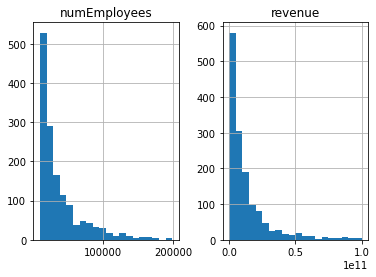

In [39]:
data.hist(bins=20)
plt.show()

## Convert the rdflib graph to NetworkX for basic graph analysis

We define functions for calculating basic node centralities from the graph, and displaying the graph.

In [40]:
def calculate_nodes_centrality(graph, centrality_type):
  if centrality_type == "closeness_centrality":
    centrality = nx.closeness_centrality(graph)
  elif centrality_type == "betweenness_centrality":
    centrality = nx.betweenness_centrality(graph)
  elif centrality_type == "degree_centrality":
    centrality = nx.degree_centrality(graph)
  else:
    raise ValueError("Not implemented")

  sorted(centrality.items(), key=lambda x: x[1], reverse=True)
  return centrality

In [41]:
def display_graph(graph):
  pos = nx.spring_layout(graph, seed=557, k=0.8)
  plt.figure(figsize=(20, 20))
  nx.draw(graph, pos, with_labels=True, font_size=14, node_size=1000, node_color='lightblue', edge_color='gray', alpha=0.6)
  plt.title('Knowledge Graph')

The function `rdflib_to_networkx_graph` converts the rdflib graph into a NetworkX graph

In [42]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph

In [43]:
nx_graph = rdflib_to_networkx_graph(g)

Let's check how many connected components we have in the graph

In [44]:
components = [c for c in nx.connected_components(nx_graph)]

In [45]:
len(components)

1

In [46]:
components

[{rdflib.term.Literal('Skopjan', lang='en'),
  rdflib.term.URIRef('http://et.dbpedia.org/resource/Skopje'),
  rdflib.term.URIRef('http://dbpedia.org/resource/World_War_II'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Turkish_bath'),
  rdflib.term.Literal('571.46', datatype=rdflib.term.URIRef('http://dbpedia.org/datatype/squareKilometre')),
  rdflib.term.URIRef('http://jv.dbpedia.org/resource/Skopje'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Goethe-Institut'),
  rdflib.term.Literal('1004', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),
  rdflib.term.Literal('Skopje (bahasa Makedonia: Скопје, penyebutan : Skopye) adalah ibu kota Makedonia Utara. Kota yang terletak di tepi ini memiliki penduduk berjumlah 515.419 jiwa. Ibu Theresa lahir di kota ini, tetapi ia adalah seorang keturunan Albania.', lang='in'),
  rdflib.term.Literal('230', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),
  rdflib.term.URIRef('http://dbpedia.or

Now, we are going to create a random subgraph from the entire graph in order to visualize it.

In [47]:
nodes = nx_graph.nodes()

In [48]:
random_nodes = sample(list(nodes), 15)

In [49]:
random_nodes

[rdflib.term.URIRef('http://dbpedia.org/resource/Byzantine_Revival_architecture'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Augustus'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Danela_Arsovska'),
 rdflib.term.URIRef('http://dbpedia.org/class/yago/YagoPermanentlyLocatedEntity'),
 rdflib.term.URIRef('http://ia.dbpedia.org/resource/Skopje'),
 rdflib.term.Literal('181630', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#nonNegativeInteger')),
 rdflib.term.URIRef('http://dbpedia.org/resource/Armenian_people'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Balkan_peninsula'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Sofia'),
 rdflib.term.URIRef('http://pnb.dbpedia.org/resource/سکوپئے'),
 rdflib.term.URIRef('http://dbpedia.org/ontology/PopulatedPlace'),
 rdflib.term.URIRef('http://dbpedia.org/resource/File:Coat_of_arms_of_Kisela_Voda_Municipality_(2015).svg'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Ottoman_cuisine'),
 rdflib.term.URIRef('http

We add Skopje to the nodes, since it's the main resource that we loaded in the graph and everything else is connected to it.

In [50]:
random_nodes.append(skopje)

In [51]:
graph_to_draw = nx_graph.subgraph(random_nodes)

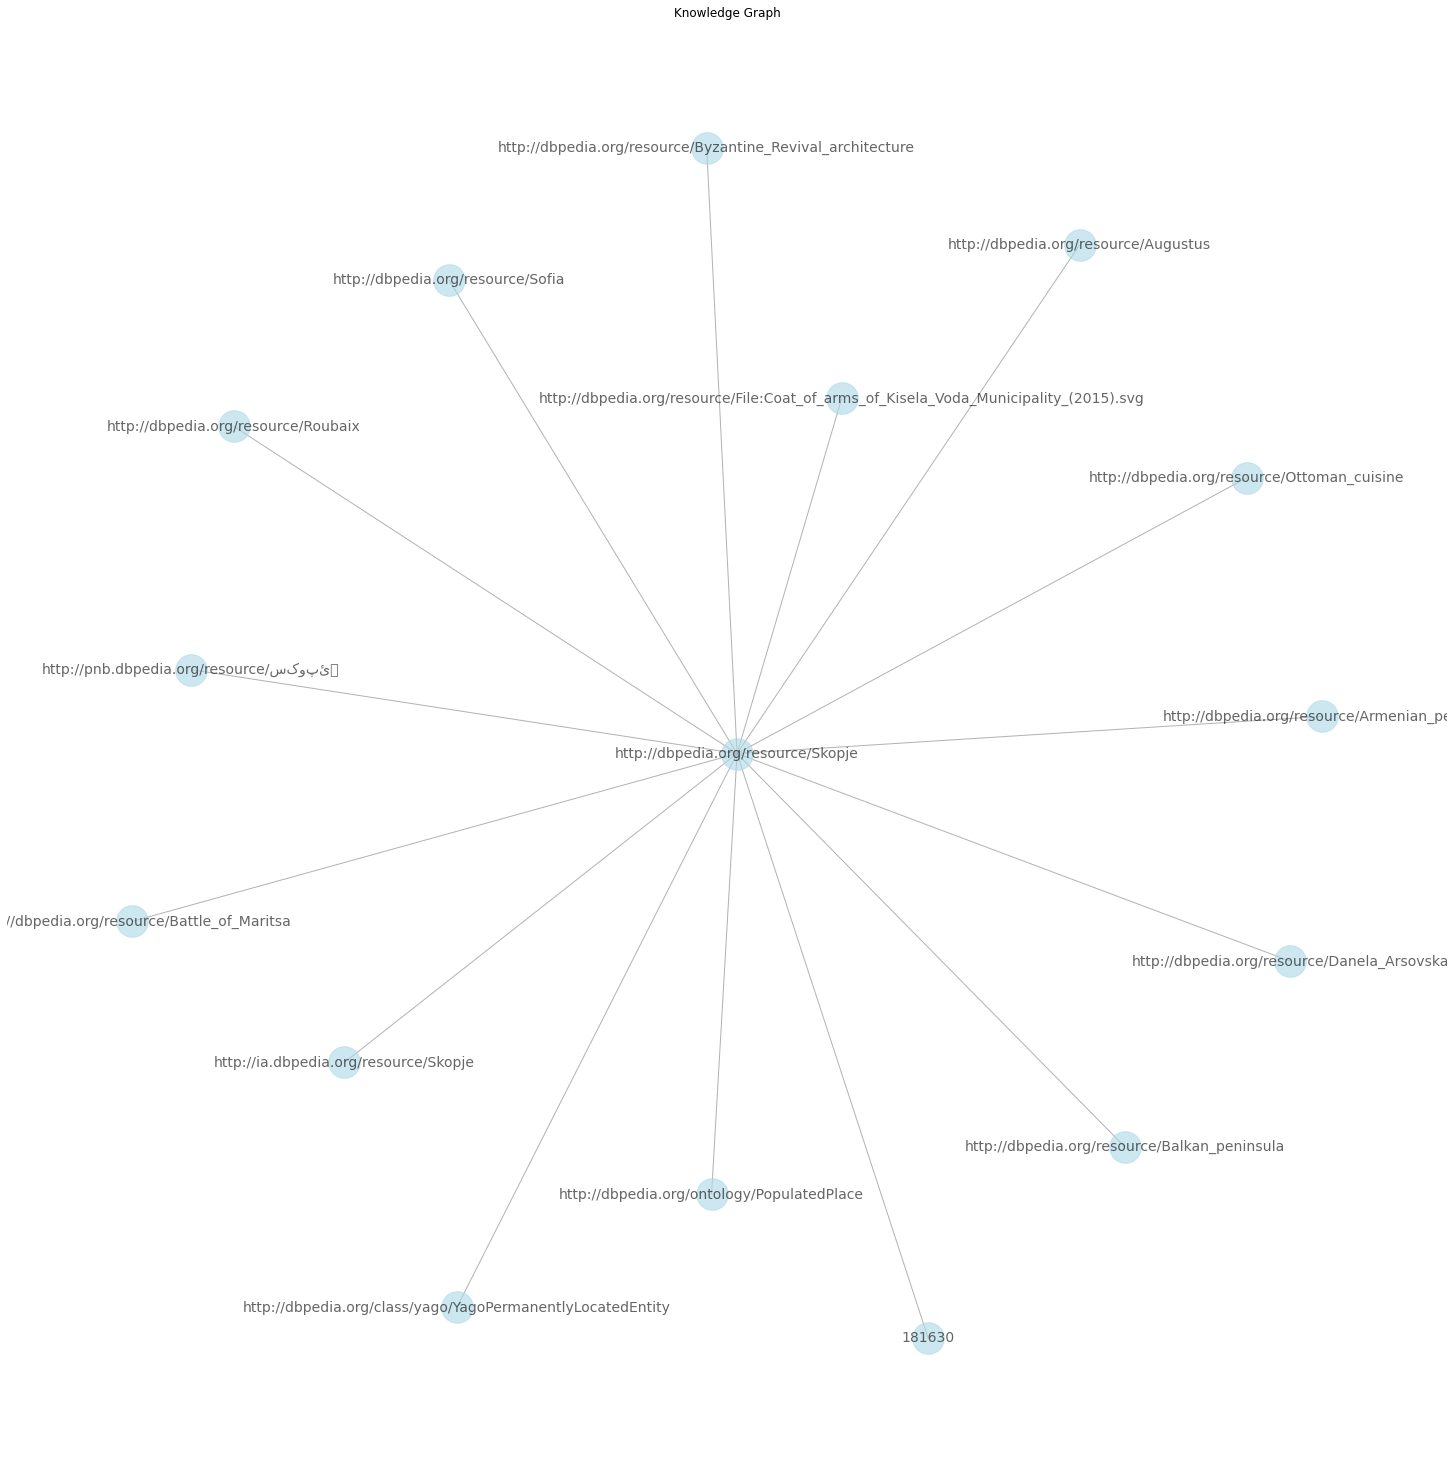

In [52]:
display_graph(graph_to_draw)

The nodes are of types `rdflib.term.URIRef` or `rdflib.term.Literal` depending on whether they are resources or literals.

In [53]:
random_nodes

[rdflib.term.URIRef('http://dbpedia.org/resource/Byzantine_Revival_architecture'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Augustus'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Danela_Arsovska'),
 rdflib.term.URIRef('http://dbpedia.org/class/yago/YagoPermanentlyLocatedEntity'),
 rdflib.term.URIRef('http://ia.dbpedia.org/resource/Skopje'),
 rdflib.term.Literal('181630', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#nonNegativeInteger')),
 rdflib.term.URIRef('http://dbpedia.org/resource/Armenian_people'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Balkan_peninsula'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Sofia'),
 rdflib.term.URIRef('http://pnb.dbpedia.org/resource/سکوپئے'),
 rdflib.term.URIRef('http://dbpedia.org/ontology/PopulatedPlace'),
 rdflib.term.URIRef('http://dbpedia.org/resource/File:Coat_of_arms_of_Kisela_Voda_Municipality_(2015).svg'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Ottoman_cuisine'),
 rdflib.term.URIRef('http

Let's take a look at the edges in the graph.

When the graph is converted from rdflib to networkx the conversion module sets two attributes on the edges: `weight` and `triples`. Weight is set to 1 for each edge, and can be used to generate a weighted graph. The triples attribute containes the (subject, predicate, object) triples which describes the nodes being linked and the type of relation.

In [54]:
for n1, n2, attr in nx_graph.edges(data=True):
    print (n1, n2, attr)

http://dbpedia.org/resource/Skopje 1098 {'triples': [(rdflib.term.URIRef('http://dbpedia.org/resource/Skopje'), rdflib.term.URIRef('http://dbpedia.org/property/quote'), rdflib.term.Literal('1098', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')))], 'weight': 1}
http://dbpedia.org/resource/Skopje http://dbpedia.org/resource/Pierre_Soulages {'triples': [(rdflib.term.URIRef('http://dbpedia.org/resource/Skopje'), rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'), rdflib.term.URIRef('http://dbpedia.org/resource/Pierre_Soulages'))], 'weight': 1}
http://dbpedia.org/resource/Skopje Skopje (/ˈskɒpji, -jeɪ/ SKOP-yee, -⁠yay, US also /ˈskoʊp-/ SKOHP-; Macedonian: Скопје [ˈskɔpjɛ]; Albanian: Shkup) is the capital and largest city of North Macedonia. It is the country's political, cultural, economic, and academic centre. The territory of Skopje has been inhabited since at least 4000 BC; remains of Neolithic settlements have been found within the old Kale Fort

http://dbpedia.org/resource/Skopje http://el.dbpedia.org/resource/Σκόπια {'triples': [(rdflib.term.URIRef('http://dbpedia.org/resource/Skopje'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#sameAs'), rdflib.term.URIRef('http://el.dbpedia.org/resource/Σκόπια'))], 'weight': 1}
http://dbpedia.org/resource/Skopje http://dbpedia.org/resource/Dyeing {'triples': [(rdflib.term.URIRef('http://dbpedia.org/resource/Skopje'), rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'), rdflib.term.URIRef('http://dbpedia.org/resource/Dyeing'))], 'weight': 1}
http://dbpedia.org/resource/Skopje http://dbpedia.org/resource/1963_Skopje_earthquake {'triples': [(rdflib.term.URIRef('http://dbpedia.org/resource/Skopje'), rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'), rdflib.term.URIRef('http://dbpedia.org/resource/1963_Skopje_earthquake'))], 'weight': 1}
http://dbpedia.org/resource/Skopje -1 {'triples': [(rdflib.term.URIRef('http://dbpedia.org/resource/Skopje'), rdflib.term

We can add edges to the network by specifying the pair of nodes the edge would connect and some additional properties.

In [55]:
nx_graph.add_edge(random_nodes[1], random_nodes[2], weight=1, triples=[(random_nodes[1], "test_link", random_nodes[2])])

In [56]:
graph_to_draw = nx_graph.subgraph(random_nodes)

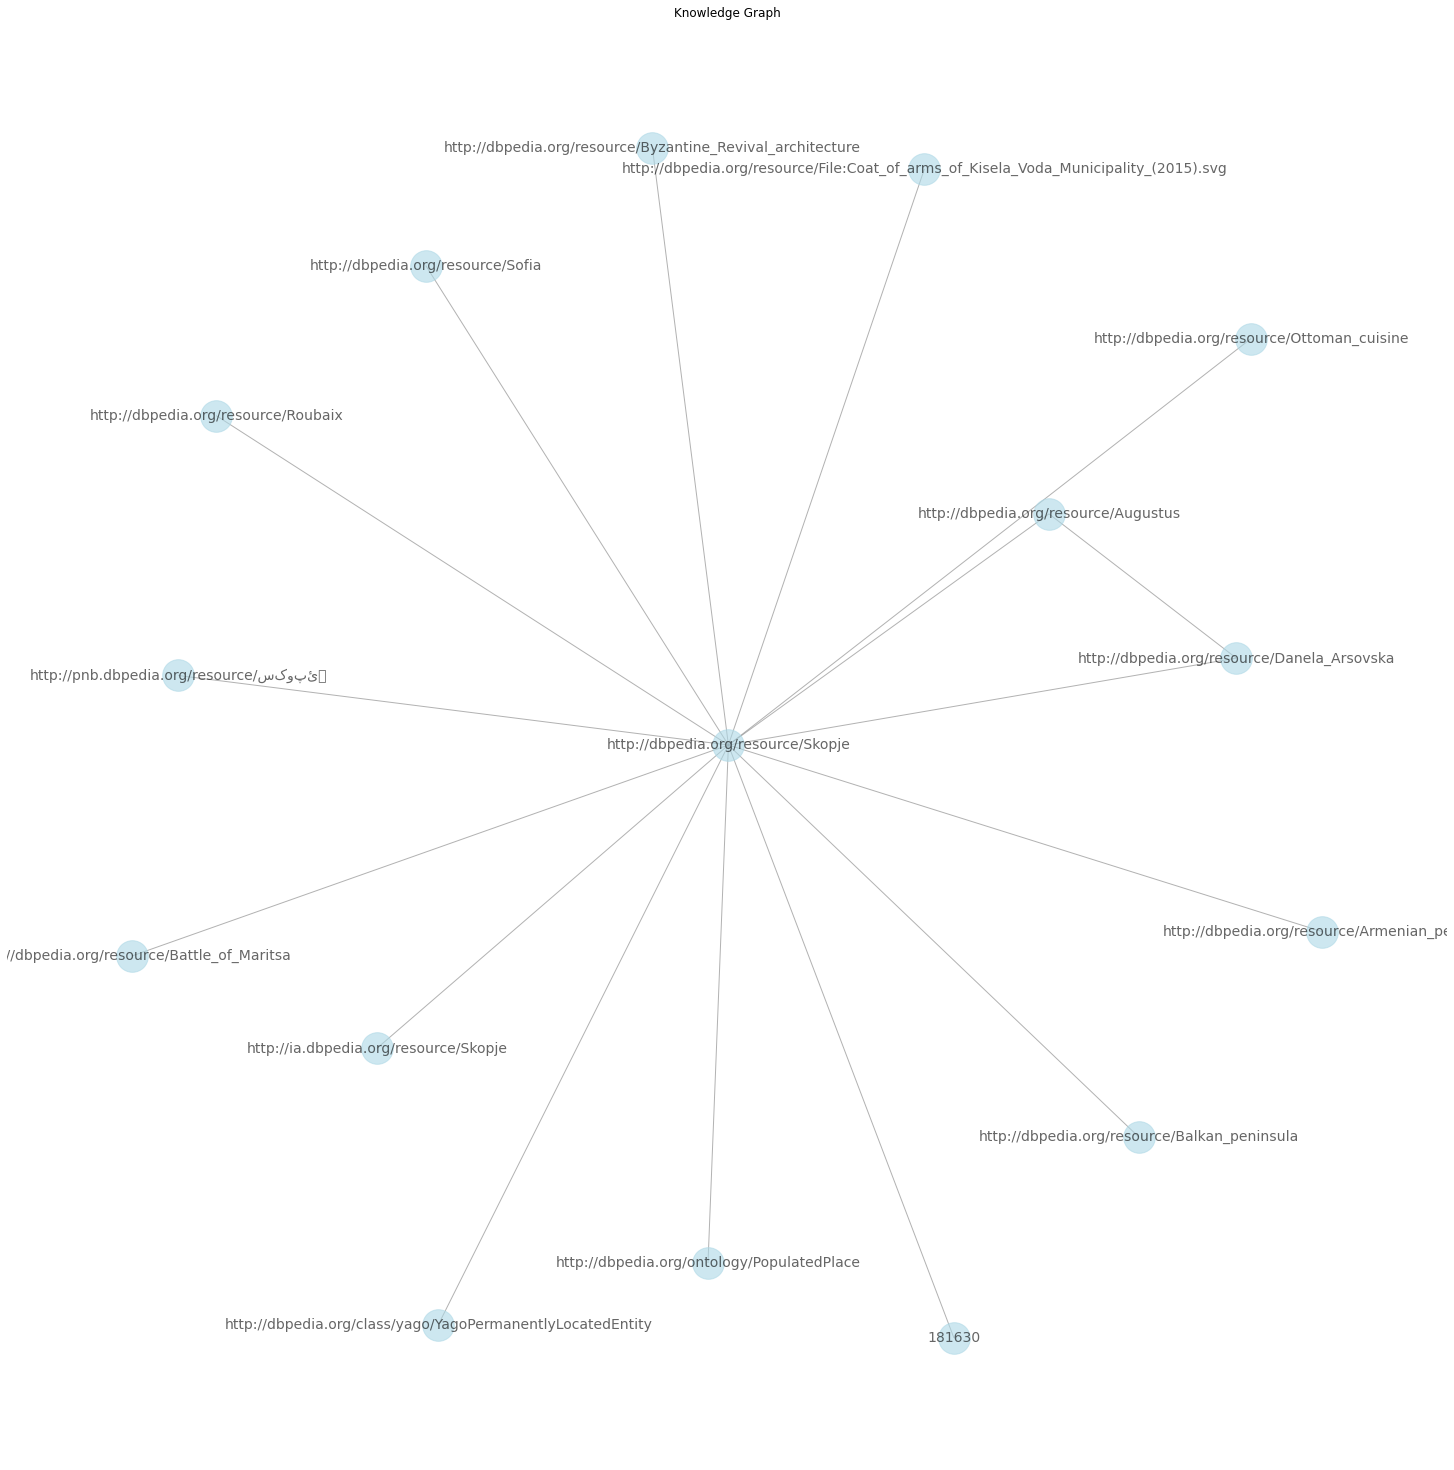

In [57]:
display_graph(graph_to_draw)

We can also add nodes to the graph.

In [58]:
hello = Literal('Hello')

In [59]:
nx_graph.add_node(hello)

Calculating basic statistics for the graph

In [60]:
num_nodes = nx_graph.number_of_nodes()
num_edges = nx_graph.number_of_edges()
print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')
print(f'Ratio edges to nodes: {round(num_edges / num_nodes, 2)}')

Number of nodes: 1156
Number of edges: 1155
Ratio edges to nodes: 1.0


Definition: Degree centrality assigns an importance score based simply on the number of links held by each node.

In [61]:
degree_centrality = calculate_nodes_centrality(nx_graph, "degree_centrality")

for node, centrality in degree_centrality.items():
  print(f'{node}: Degree Centrality = {centrality:.2f}')

http://dbpedia.org/resource/Skopje: Degree Centrality = 1.00
1098: Degree Centrality = 0.00
http://dbpedia.org/resource/Pierre_Soulages: Degree Centrality = 0.00
Skopje (/ˈskɒpji, -jeɪ/ SKOP-yee, -⁠yay, US also /ˈskoʊp-/ SKOHP-; Macedonian: Скопје [ˈskɔpjɛ]; Albanian: Shkup) is the capital and largest city of North Macedonia. It is the country's political, cultural, economic, and academic centre. The territory of Skopje has been inhabited since at least 4000 BC; remains of Neolithic settlements have been found within the old Kale Fortress that overlooks the modern city centre. Originally a Paeonian city, Scupi became the capital of Dardania in the second century BC. On the eve of the 1st century AD, the settlement was seized by the Romans and became a military camp. When the Roman Empire was divided into eastern and western halves in 395 AD, Scupi came under Byzantine rule from Constantinople. During much of the early medieval period, the town was contested between the Byzantines and t

Definition: Betweenness centrality measures the number of times a node lies on the shortest path between other nodes.



In [62]:
betweenness_centrality = calculate_nodes_centrality(nx_graph, "betweenness_centrality")

for node, centrality in betweenness_centrality.items():
  print(f'Betweenness Centrality of {node}: {centrality:.2f}')

Betweenness Centrality of http://dbpedia.org/resource/Skopje: 1.00
Betweenness Centrality of 1098: 0.00
Betweenness Centrality of http://dbpedia.org/resource/Pierre_Soulages: 0.00
Betweenness Centrality of Skopje (/ˈskɒpji, -jeɪ/ SKOP-yee, -⁠yay, US also /ˈskoʊp-/ SKOHP-; Macedonian: Скопје [ˈskɔpjɛ]; Albanian: Shkup) is the capital and largest city of North Macedonia. It is the country's political, cultural, economic, and academic centre. The territory of Skopje has been inhabited since at least 4000 BC; remains of Neolithic settlements have been found within the old Kale Fortress that overlooks the modern city centre. Originally a Paeonian city, Scupi became the capital of Dardania in the second century BC. On the eve of the 1st century AD, the settlement was seized by the Romans and became a military camp. When the Roman Empire was divided into eastern and western halves in 395 AD, Scupi came under Byzantine rule from Constantinople. During much of the early medieval period, the tow

Definition: Closeness centrality scores each node based on their ‘closeness’ to all other nodes in the network. This measure calculates the shortest paths between all nodes, then assigns each node a score based on its sum of shortest paths.



In [63]:
closeness_centrality = calculate_nodes_centrality(nx_graph, "closeness_centrality")
for node, centrality in closeness_centrality.items():
  print(f'Closeness Centrality of {node}: {centrality:.2f}')

Closeness Centrality of http://dbpedia.org/resource/Skopje: 1.00
Closeness Centrality of 1098: 0.50
Closeness Centrality of http://dbpedia.org/resource/Pierre_Soulages: 0.50
Closeness Centrality of Skopje (/ˈskɒpji, -jeɪ/ SKOP-yee, -⁠yay, US also /ˈskoʊp-/ SKOHP-; Macedonian: Скопје [ˈskɔpjɛ]; Albanian: Shkup) is the capital and largest city of North Macedonia. It is the country's political, cultural, economic, and academic centre. The territory of Skopje has been inhabited since at least 4000 BC; remains of Neolithic settlements have been found within the old Kale Fortress that overlooks the modern city centre. Originally a Paeonian city, Scupi became the capital of Dardania in the second century BC. On the eve of the 1st century AD, the settlement was seized by the Romans and became a military camp. When the Roman Empire was divided into eastern and western halves in 395 AD, Scupi came under Byzantine rule from Constantinople. During much of the early medieval period, the town was co